<a href="https://colab.research.google.com/github/farielshafee2018/JPMorgan-finance-data/blob/main/jpmorgandefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("/content/Task 3 and 4_Loan_Data.csv")

In [ ]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [ ]:
df.isnull().sum()

,0
customer_id,0
credit_lines_outstanding,0
loan_amt_outstanding,0
total_debt_outstanding,0
income,0
years_employed,0
fico_score,0
default,0


Correlation of variables with 'default':
default                     1.000000
credit_lines_outstanding    0.862815
total_debt_outstanding      0.758868
loan_amt_outstanding        0.098978
income                      0.016309
years_employed             -0.284506
fico_score                 -0.324515
Name: default, dtype: float64




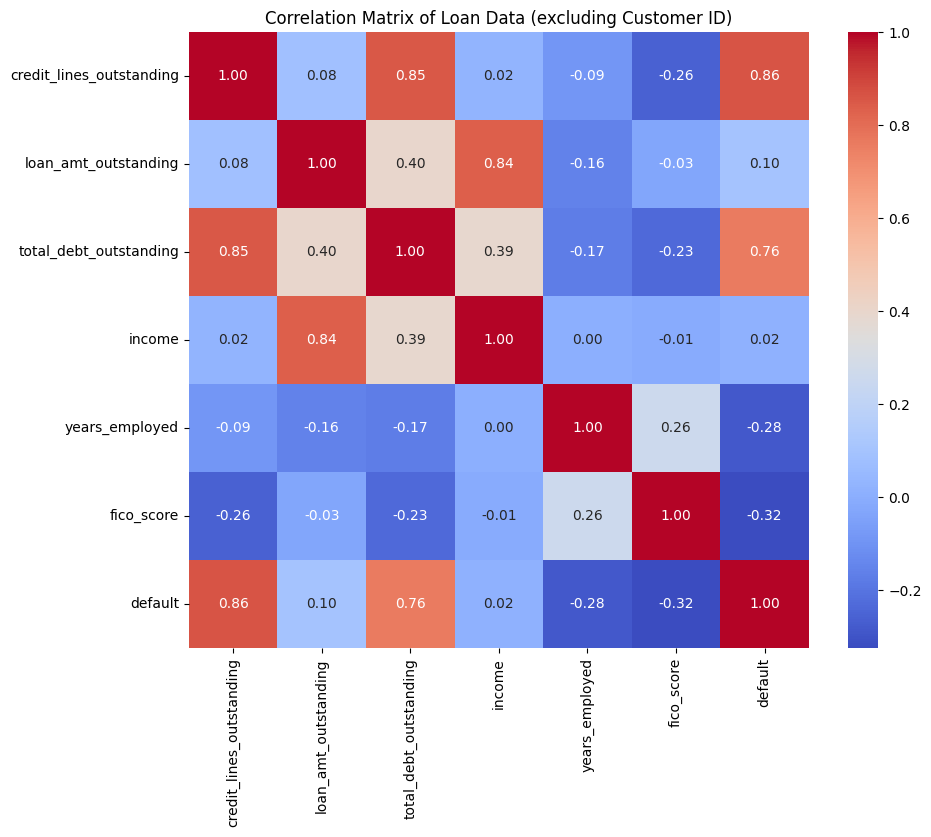

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop 'customer_id'
df_corr = df.drop(columns=['customer_id'])

# Calculate correlations with the 'default' column
correlations_with_default = df_corr.corr()['default'].sort_values(ascending=False)

print("Correlation of variables with 'default':")
print(correlations_with_default)
print("\n")

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Loan Data (excluding Customer ID)')
plt.show()

We see that that total debt outstanding and credit lines outstanding are highly correlated.  We first try all the variables in a multivariable linear regression, check the accuracy, and then omit one of the two variables if needed

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define features (X) and target (y)
# Exclude 'customer_id' as it's an identifier and 'default' is the target
X = df.drop(columns=['customer_id', 'default'])
y = df['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Mean Absolute Error (MAE): 0.1243
Mean Squared Error (MSE): 0.0307
Root Mean Squared Error (RMSE): 0.1753
R-squared (R2): 0.7861

Model Coefficients:
credit_lines_outstanding: 0.1801
loan_amt_outstanding: 0.0000
total_debt_outstanding: 0.0000
income: -0.0000
years_employed: -0.0469
fico_score: -0.0004
Intercept: 0.3889


get the coefficient matrix

### Recalculating VIF after removing 'income'

First, let's redefine our feature set `X` by dropping the 'income' column.

In [ ]:
# Redefine features (X) by excluding 'income'
X_no_income = df.drop(columns=['customer_id', 'default', 'income'])

# Create a DataFrame to store VIF values
vif_data_no_income = pd.DataFrame()
vif_data_no_income['feature'] = X_no_income.columns

# Calculate VIF for each feature
vif_data_no_income['VIF'] = [variance_inflation_factor(X_no_income.values, i) for i in range(len(X_no_income.columns))]

print("Variance Inflation Factor (VIF) for each feature (excluding 'income'):")
display(vif_data_no_income.sort_values(by='VIF', ascending=False))


Variance Inflation Factor (VIF) for each feature (excluding 'income'):


,feature,VIF
4,fico_score,20.860322
2,total_debt_outstanding,16.798047
1,loan_amt_outstanding,15.138072
3,years_employed,10.473896
0,credit_lines_outstanding,8.662408


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Variance Inflation Factor (VIF) for each feature:")
display(vif_data.sort_values(by='VIF', ascending=False))


Variance Inflation Factor (VIF) for each feature:


,feature,VIF
3,income,59.930812
1,loan_amt_outstanding,35.088036
5,fico_score,22.404742
2,total_debt_outstanding,21.937163
4,years_employed,11.896744
0,credit_lines_outstanding,10.948846


A VIF value greater than 5 (or sometimes 10) is often considered an indication of high multicollinearity. High multicollinearity can make it difficult to interpret the individual coefficients of the regression model, as the effects of the correlated variables are hard to disentangle.

In [ ]:
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("Coefficient Matrix:")
display(coefficients_df)
print(f"Intercept: {model.intercept_:.4f}")

Coefficient Matrix:


,Feature,Coefficient
0,credit_lines_outstanding,1.800588e-01
1,loan_amt_outstanding,6.214924e-07
2,total_debt_outstanding,1.614004e-06
3,income,-2.960482e-07
4,years_employed,-4.686117e-02
5,fico_score,-3.902616e-04


Intercept: 0.3889


We see that there is a very high level of colinearity even after removing income.  SO we use a different model.  Let us try decision tree.

Decision Tree Accuracy: 0.9955

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      0.99      0.99       348

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix (Decision Tree):


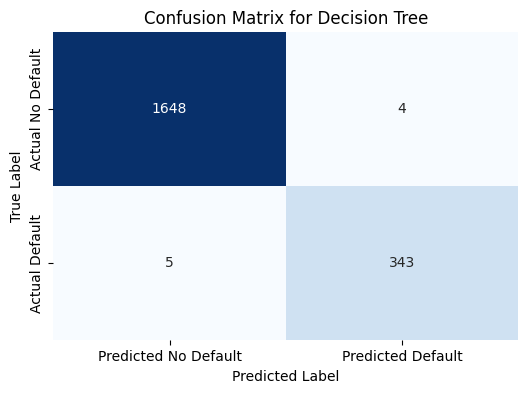

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y are already defined from the previous linear regression step
# If X was modified (e.g., X_no_income), we should clarify which X to use.
# For now, let's use the original X with all features before any VIF-based removals.
# If the user explicitly wants X_no_income, we can adjust.
# X = df.drop(columns=['customer_id', 'default'])
# y = df['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report (Decision Tree):")
print(classification_rep_dt)

print("\nConfusion Matrix (Decision Tree):")
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Default', 'Predicted Default'],
            yticklabels=['Actual No Default', 'Actual Default'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

This model seems very highly accurate.  Let us find the coefficients

In [ ]:
import pandas as pd

def predict_default_and_loss(customer_id, recovery_rate=0.10):
    """
    Predicts the probability of default and the expected loss for a loan applicant
    using the trained Decision Tree model, given a customer_id from the original DataFrame.

    Args:
        customer_id (int): The customer ID from the original DataFrame.
        recovery_rate (float, optional): The recovery rate as a decimal (e.g., 0.10 for 10%).
                                         Defaults to 0.10.

    Returns:
        tuple: A tuple containing:
            float: The predicted probability of default (for class 1) for the specified customer.
            float: The expected loss from the loan.
            None: If the customer_id is not found.
    """
    # Find the row corresponding to the customer_id in the original DataFrame df
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"Error: Customer ID {customer_id} not found in the dataset.")
        return None, None

    # Extract features for prediction. Ensure columns match the X used for training.
    input_features = customer_data[X.columns]

    # Get loan_amt_outstanding for Expected Loss calculation (Exposure at Default)
    loan_amt_outstanding = customer_data['loan_amt_outstanding'].iloc[0]

    # Predict probabilities
    probabilities = decision_tree_model.predict_proba(input_features)
    prob_default = probabilities[0][1]

    # Calculate Loss Given Default (LGD)
    lgd = 1 - recovery_rate

    # Calculate Expected Loss (EL = PD * LGD * EAD)
    expected_loss = prob_default * lgd * loan_amt_outstanding
    print(f"expected loss: {expected_loss}, probability of default: {prob_default}")

    return prob_default, expected_loss

print("Function 'predict_default_and_loss' created to calculate both probability of default and expected loss.")


Function 'predict_default_and_loss' created to calculate both probability of default and expected loss.


try it out

In [ ]:
predict_default_and_loss(2256073)

expected loss: 0.0, probability of default: 0.0


(np.float64(0.0), np.float64(0.0))

In [ ]:
predict_default_and_loss(7442532)

expected loss: 1763.0358534000002, probability of default: 1.0


(np.float64(1.0), np.float64(1763.0358534000002))